# Spike sorting w/o drift corr

10 min recording | +/- drift correction | high-pass filt.| - bad channels

author: laquitainesteeve@gmail.com

Tested on an Ubuntu 24 with a 32GB VRAM Nvidia RTX 5090

Execution time: 16 min

## Setup 

1. Enable forward compatibility if your GPU and CUDA libraries are more recent and not supported by editing your matlab `startup.m` file to contain "parallel.gpu.enableCUDAForwardCompatibility(true)" and:

    ```bash
    # manually compile Kilosort3 with CUDA support for forward compatibility
    sudo apt install gcc-11 g++-11 # install gcc 11 compiler
    sudo update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-11 100 # enable temporary
    cd /home/steeve/steeve/epfl/code/spikebias/dataset/01_intermediate/sorters/Kilosort3_buttw_forwcomp/CUDA/
    matlab -batch mexGPUall  # compile matlab mex files
    ```

2. Activate `spikesort_rtx5090` environment and select kernel

    ```bash
    python -m ipykernel install --user --name spikesort_rtx5090 --display-name "spikesort_rtx5090"
    ```

3. Run notebook or pipeline:
    ```bash
    # ks3 - npx spontaneous
    nohup python -m src.pipes.sorting.test_params.driftcorr.npx_spont.10m.ks3 \
        --recording-path dataset/00_raw/recording_npx_spont \
            --preprocess-path dataset/01_intermediate/preprocessing/recording_npx_spont \
                --sorting-path-corrected ./temp/npx_spont/SortingKS3_10m_RTX5090_DriftCorr \
                    --sorting-output-path-corrected ./temp/npx_spont/KS3_output_10m_RTX5090_DriftCorr/ \
                        --study-path-corrected ./temp/npx_spont/study_ks3_10m_RTX5090_DriftCorr/ \
                            --sorting-path-not-corrected ./temp/npx_spont/SortingKS3_10m_RTX5090_NoDriftCorr \
                                --sorting-output-path-not-corrected ./temp/npx_spont/KS3_output_10m_RTX5090_NoDriftCorr/ \
                                    --study-path-not-corrected ./temp/npx_spont/study_ks3_10m_RTX5090_NoDriftCorr/
    ```

In [4]:
%%time 
%load_ext autoreload
%autoreload 2

# import python packages
import os
from matplotlib import pyplot as plt;
import spikeinterface.extractors as se
import spikeinterface.sorters as ss
import spikeinterface as si
print("spikeinterface", si.__version__)

# project path
PROJ_PATH = "/home/steeve/steeve/epfl/code/spikebias/"
os.chdir(PROJ_PATH)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
spikeinterface 0.100.5
CPU times: user 444 µs, sys: 14 µs, total: 458 µs
Wall time: 415 µs


## +/- drift correction

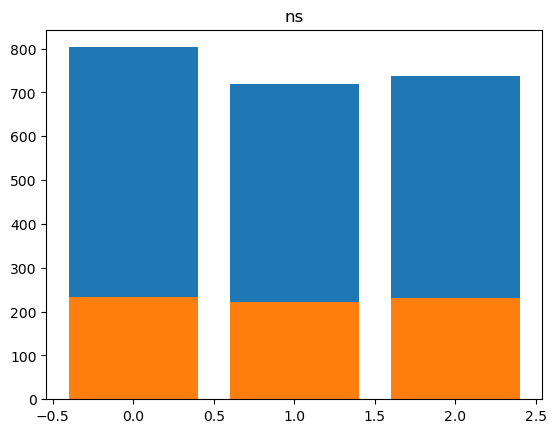

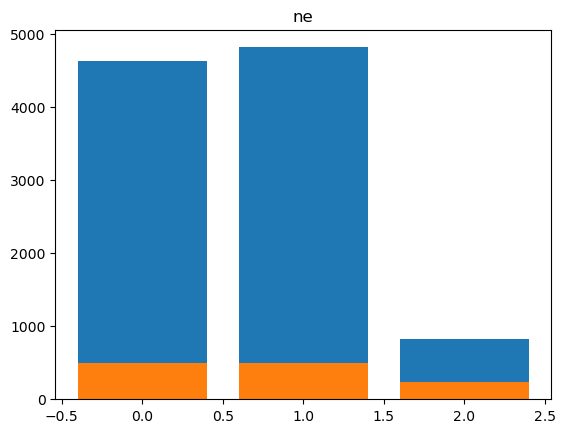

Text(0.5, 1.0, 'ds1')

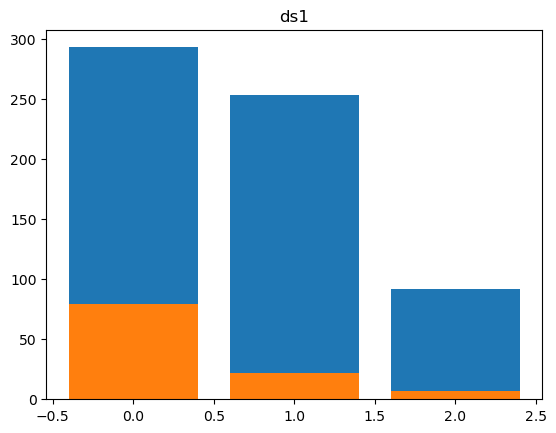

In [5]:
# Compare sorting results
# spont
ks3_corr_v100_ns = si.load_extractor("./dataset/01_intermediate/sorting/npx_spont/SortingKS3_10m") # corrected on V100
ks3_corr_rtx_ns = si.load_extractor("./temp/npx_spont/SortingKS3_10m_RTX5090_DriftCorr") # corrected on RTX
ks3_nocorr_rtx_ns = si.load_extractor("./temp/npx_spont/SortingKS3_10m_RTX5090_NoDriftCorr") # no correction

# evoked
ks3_corr_v100_ne = si.load_extractor("./dataset/01_intermediate/sorting/npx_evoked/SortingKS3_10m")
ks3_corr_rtx_ne = si.load_extractor("./temp/npx_evoked_20khz/SortingKS3_10m_RTX5090_DriftCorr")
ks3_nocorr_rtx_ne = si.load_extractor("./temp/npx_evoked_20khz/SortingKS3_10m_RTX5090_NoDriftCorr")

# dense 1
ks3_corr_v100_ds1 = si.load_extractor("./dataset/01_intermediate/sorting/dense_probe1/SortingKS3_10m")
ks3_corr_rtx_ds1 = si.load_extractor("./temp/dense_spont_probe1/SortingKS3_10m_RTX5090_DriftCorr")
ks3_nocorr_rtx_ds1 = si.load_extractor("./temp/dense_spont_probe1/SortingKS3_10m_RTX5090_NoDriftCorr")


# plot
plt.bar(x=[0,1,2], height=[len(ks3_corr_v100_ns.unit_ids), 
                           len(ks3_corr_rtx_ns.unit_ids), 
                           len(ks3_nocorr_rtx_ns.unit_ids),
                           ]);
plt.bar(x=[0,1,2], height=[sum(ks3_corr_v100_ns.get_property('KSLabel')=='good'), 
                           sum(ks3_corr_rtx_ns.get_property('KSLabel')=='good'), 
                           sum(ks3_nocorr_rtx_ns.get_property('KSLabel')=='good'),
                           ]);
plt.title('ns')
plt.show()

# plot
plt.bar(x=[0,1,2], height=[len(ks3_corr_v100_ne.unit_ids), 
                           len(ks3_corr_rtx_ne.unit_ids), 
                           len(ks3_nocorr_rtx_ne.unit_ids),
                           ]);
plt.bar(x=[0,1,2], height=[sum(ks3_corr_v100_ne.get_property('KSLabel')=='good'), 
                           sum(ks3_corr_rtx_ne.get_property('KSLabel')=='good'), 
                           sum(ks3_nocorr_rtx_ne.get_property('KSLabel')=='good'),
                           ]);
plt.title('ne')
plt.show()


# plot
plt.bar(x=[0,1,2], height=[len(ks3_corr_v100_ds1.unit_ids), 
                           len(ks3_corr_rtx_ds1.unit_ids), 
                           len(ks3_nocorr_rtx_ds1.unit_ids),
                           ]);
plt.bar(x=[0,1,2], height=[sum(ks3_corr_v100_ds1.get_property('KSLabel')=='good'), 
                           sum(ks3_corr_rtx_ds1.get_property('KSLabel')=='good'), 
                           sum(ks3_nocorr_rtx_ds1.get_property('KSLabel')=='good'),
                           ]);
plt.title('ds1')

In [1]:
182 + 322

504

In [6]:
len(ks3_corr_v100_ns.unit_ids)

803

In [13]:
sum(ks3_corr_v100_ns.get_property('KSLabel')=="mua")

570

In [16]:
len(ks3_corr_v100_ne.unit_ids)
#400 + 3089  

4634